# Imports

In [2]:
%matplotlib inline
import json
import tensorflow as tf
import pandas as pd 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import utils

In [3]:
try:
    import datasets
except ModuleNotFoundError:
    !pip install datasets
    import datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 452 kB 19.7 MB/s 
     |████████████████████████████████| 212 kB 59.7 MB/s 
     |████████████████████████████████| 182 kB 60.5 MB/s 
     |████████████████████████████████| 132 kB 59.2 MB/s 
     |████████████████████████████████| 127 kB 58.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


# Load data

In [9]:
#Loading dataset
from datasets import load_dataset
train = load_dataset("go_emotions", split="train")
test = load_dataset("go_emotions", split="test")
valid = load_dataset("go_emotions", split="validation")

#EDA

In [10]:
print(len(train),"   ",len(test),"    ",len(valid))

43410     5427      5426


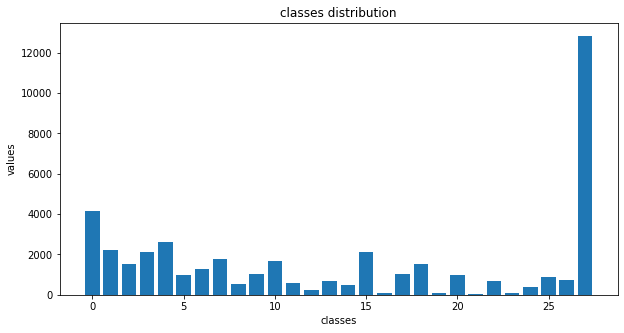

In [11]:
train_eda=pd.DataFrame(train)
train_eda['labels']=train_eda.labels.map(lambda x:x[0])
import matplotlib.pyplot as plt
a=train_eda.labels.value_counts();x=a.index; y=a.values
fig=plt.figure(figsize = (10, 5))
plt.bar(x,y)
plt.xlabel("classes")
plt.ylabel("values")
plt.title('classes distribution')
plt.show()

#PREPROCESSING


In [12]:
#We've noticed that our labels were kind of list of list instead we want it to be just a list
def label(df):
    labels=[x[0] for x in df['labels']]
    return labels

In [13]:
tr = label(train)
ts = label(test)

In [14]:
training_label=utils.to_categorical(tr)
testing_label=utils.to_categorical(ts)

In [15]:
training_label.shape

(43410, 28)

In [16]:
training_sentences = train['text']
testing_sentences = test['text']

In [17]:
#Hyperparameters
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [18]:
tokenizer = Tokenizer(num_words=None, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
max_length = max([len(x) for x in training_sequences])
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [24]:
#Hyperparams
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

max_length

142

In [20]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_label)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_label)

# Model Training

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(28, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 142, 16)           451344    
                                                                 
 global_average_pooling1d_5   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_20 (Dense)            (None, 64)                1088      
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 64)                4160      
                                                      

In [35]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(150,return_sequences=True)))
model.add(Bidirectional(LSTM(75)))
model.add(Dense(32,activation='relu'))
model.add(Dense(28, activation='softmax'))
model.add(Dropout(0.6))
#adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
num_epochs = 30
history = model.fit(training_padded, training_labels, batch_size=30, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
1447/1447 - 47s - loss: 10.3748 - accuracy: 0.1902 - val_loss: 2.2395 - val_accuracy: 0.4308 - 47s/epoch - 33ms/step
Epoch 2/30
1447/1447 - 43s - loss: 10.2260 - accuracy: 0.2313 - val_loss: 2.0545 - val_accuracy: 0.4667 - 43s/epoch - 30ms/step
Epoch 3/30
1447/1447 - 41s - loss: 10.1956 - accuracy: 0.2437 - val_loss: 1.9342 - val_accuracy: 0.4901 - 41s/epoch - 29ms/step
Epoch 4/30
1447/1447 - 41s - loss: 10.1858 - accuracy: 0.2566 - val_loss: 1.8684 - val_accuracy: 0.4979 - 41s/epoch - 28ms/step
Epoch 5/30
1447/1447 - 42s - loss: 10.0539 - accuracy: 0.2707 - val_loss: 1.8332 - val_accuracy: 0.5041 - 42s/epoch - 29ms/step
Epoch 6/30
1447/1447 - 42s - loss: 10.0454 - accuracy: 0.2832 - val_loss: 1.8328 - val_accuracy: 0.4907 - 42s/epoch - 29ms/step
Epoch 7/30
1447/1447 - 41s - loss: 9.9712 - accuracy: 0.2934 - val_loss: 1.8428 - val_accuracy: 0.4901 - 41s/epoch - 28ms/step
Epoch 8/30
1447/1447 - 41s - loss: 10.0034 - accuracy: 0.2999 - val_loss: 1.8524 - val_accuracy: 0.4949 -

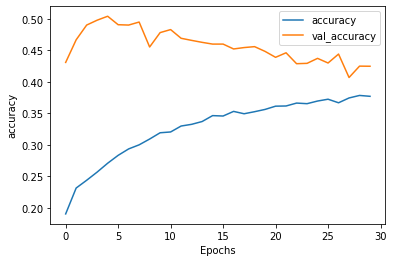

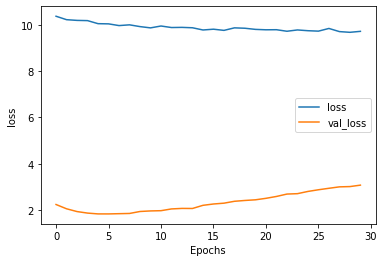

In [56]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [40]:
post=valid['text'][0]

In [54]:
post

'Is this in New Orleans?? I really feel like this is New Orleans.'

In [46]:
token_list = tokenizer.texts_to_sequences([post])[0]
token_list = pad_sequences([token_list], maxlen=max_length, padding='pre')
predicted = np.argmax(model.predict(token_list), axis=1)

1/1 [==============================] - 1s 1s/step


In [55]:
predicted
#Predicted neutral which seems correct for our post

array([27])